# ITAcademy - Data Science amb Python
# Sprint 6, Tasca 1: Mètodes de mostreig

In [206]:
import math

import numpy as np
from numpy import random
import pandas as pd

pd.options.display.float_format = "{:.2f}".format
pd.set_option('display.max_columns', None)

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

El mostreig és el procés de selecció d'un nombre aleatori d'unitats d'una població coneguda. Permet obtenir informació i treure conclusions sobre una població a partir de les estadístiques d'aquestes unitats (és a dir, la mostra), sense necessitat d'haver d'estudiar a tota la població.

Existeixen dos tipus de tècniques de mostreig:

**Mostreig probabilístic:** casos en els quals cada unitat d'una població determinada té la mateixa probabilitat de ser seleccionada. Aquesta tècnica inclou el mostreig aleatori simple, el mostreig sistemàtic, el mostreig per grups i el mostreig aleatori estratificat.

**Mostreig no probabilístic:** casos en els quals les unitats d'una població determinada no tenen la mateixa probabilitat de ser seleccionades. Aquesta tècnica inclou el mostreig de conveniència, el mostreig per quotes, el mostreig per judici i el mostreig de bola de neu. En comparació amb el mostreig probabilístic, aquesta tècnica és més propensa a acabar amb un grup de mostra no representatiu, la qual cosa porta a conclusions errònies sobre la població.

Durant aquesta tasca explorarem diverses tècniques de mostreig probabilístic. Abans d'això, parlarem sobre el dataset amb el qual treballarem.

## Descripció del dataset

### Context

Nom del dataset: **120 anys d'història olímpica: atletes i resultats**

Aquest és un conjunt de dades històriques dels Jocs Olímpics moderns, des de la primera edició d'Atenes 1896 fins a l'edició de Rio 2016. Aquest conjunt de dades es va obtenir de www.sports-reference.com mitjançant web scraping el maig de 2018. Per tant, no s'inclouen els Jocs de Tokyo 2020.

Cal assenyalar que els Jocs d'Hivern i els Jocs d'Estiu es van celebrar el mateix any fins al 1992. Després d'això, van ser intercalats de tal manera que els Jocs d'Hivern iniciaren el seu cicle de quatre anys en 1994, mentre que els Jocs d'Estiu l'iniciaren en 1996. Un error comú que la gent comet en analitzar aquestes dades és assumir qu sempre han estat intercalats.


### Contingut

L'arxiu `athlete_events.csv` conté 271116 files i 15 columnes. Cada fila correspon a un únic atleta competint en un esdeveniment Olímpic individual (atleta-esdeveniment). Les columnes són: 

0. **ID** - Número d'identificació únic per a cada atleta
1. **Name** - Nom
2. **Sex** - Gènere - *Home (M) o dona (F)*
3. **Age** - Edat - *De tipus `int`*
4. **Height** - Altura - *En centímetres*
5. **Weight** - Pes - *En kilograms*
6. **Team** - Nom de l'equip
7. **NOC** - Comitè Olímpic Nacional - *Codi de 3 lletres*
8. **Games** - Any i temporada
9. **Year** - Any de l'edició - *De tipus `int`*
10. **Season** - Temporada - *Estiu (Summer) o Hivern (Winter)*
11. **City** - Ciutat amfitriona
12. **Sport** - Esport
13. **Event** - Esdeveniment
14. **Medal** - Medalla obtinguda - *Or (Gold), Plata (Silver), Bronze (Bronze), o No obtiguda/No disponible (NA)*

In [207]:
# Carreguem el dataset
df = pd.read_csv('athlete_events.csv')
df.sample(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
19252,10194,Carina Marguerite Benninga,F,26.00,164.00,64.00,Netherlands,NED,1988 Summer,1988,Summer,Seoul,Hockey,Hockey Women's Hockey,Bronze
138734,69693,Zenon Licznerski,M,21.00,182.00,74.00,Poland,POL,1976 Summer,1976,Summer,Montreal,Athletics,Athletics Men's 100 metres,NaN
142991,71756,"Patricia Elaine ""Patty"" Loverock",F,23.00,173.00,59.00,Canada,CAN,1976 Summer,1976,Summer,Montreal,Athletics,Athletics Women's 200 metres,NaN
2264,1254,Macarena Aguilar Daz,F,31.00,170.00,67.00,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Women's Handball,NaN
223725,112362,Naydene Smith,F,24.00,180.00,68.00,South Africa,RSA,2012 Summer,2012,Summer,London,Rowing,Rowing Women's Coxless Pairs,NaN


Farem a continuació una petita descripció general del Dataframe, així com de cadascuna de les columnes d'interès.

In [208]:
# Descripció del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [209]:
# Descripció de les variables numériques
df.describe()

,ID,Age,Height,Weight,Year
count,271116.00,261642.00,210945.00,208241.00,271116.00
mean,68248.95,25.56,175.34,70.70,1978.38
std,39022.29,6.39,10.52,14.35,29.88
min,1.00,10.00,127.00,25.00,1896.00
25%,34643.00,21.00,168.00,60.00,1960.00
50%,68205.00,24.00,175.00,70.00,1988.00
75%,102097.25,28.00,183.00,79.00,2002.00
max,135571.00,97.00,226.00,214.00,2016.00


In [210]:
# Descripció de les variables categòriques
df.describe(include='object')

,Name,Sex,Team,NOC,Games,Season,City,Sport,Event,Medal
count,271116,271116,271116,271116,271116,271116,271116,271116,271116,39783
unique,134732,2,1184,230,51,2,42,66,765,3
top,Robert Tait McKenzie,M,United States,USA,2000 Summer,Summer,London,Athletics,Football Men's Football,Gold
freq,58,196594,17847,18853,13821,222552,22426,38624,5733,13372


In [211]:
# Creem una funció que construeixi un dataframe amb els valors faltants de cada variable
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table = mis_val_table.rename(columns = {0 : 'Valors Faltants', 1 : '% de Valors Totals'})
    mis_val_table =  mis_val_table[mis_val_table.iloc[:,1] != 0].sort_values(by='% de Valors Totals', ascending=False).round(1)
    print ("El DataFrame seleccionat conté " + str(df.shape[1]) + " columnes.\n"      
        "Hi han " + str(mis_val_table.shape[0]) + " columnes amb valors faltants.")
    if mis_val_table.shape[0] != 0:
        return mis_val_table

In [212]:
missing_values_table(df)

El DataFrame seleccionat conté 15 columnes.
Hi han 4 columnes amb valors faltants.


,Valors Faltants,% de Valors Totals
Medal,231333,85.30
Weight,62875,23.20
Height,60171,22.20
Age,9474,3.50


#### Sex

In [213]:
df.value_counts("Sex", normalize=True)

Sex
M   0.73
F   0.27
dtype: float64

En general, el 72,5% dels atletes del dataset son homes, mentres que el 27,5% son dones.

  Fem una gràfica per visualitzar com ha canviat aquesta proporció al llarg dels anys per als Jocs d'Estiu.

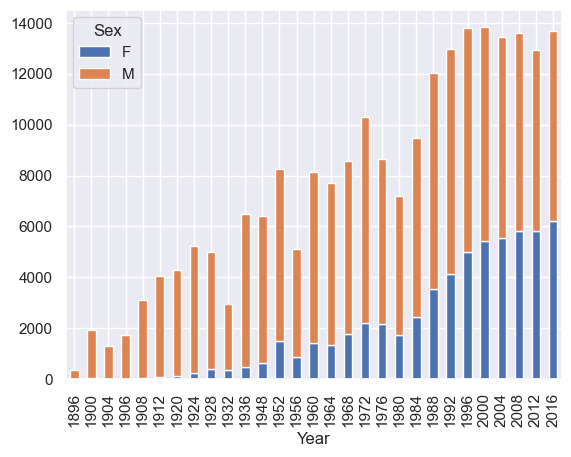

In [214]:
mask = df["Season"] == "Summer"

sex_by_year = df[mask].groupby(["Year", "Sex"]).size()
sex_by_year.unstack().plot(kind='bar', stacked=True)
plt.show()

La proporció de gèneres en la última edició dels Jocs d'Estiu (Rio de Janeiro 2016) és la següent:

In [215]:
df[df["City"]=="Rio de Janeiro"].value_counts("Sex", normalize=True)

Sex
M   0.55
F   0.45
dtype: float64

#### Sport

In [216]:
df_sport = np.sort(df["Sport"].unique())
print("Hi han {} esports en total: ".format(len(df_sport)))
print(df_sport)

Hi han 66 esports en total: 
['Aeronautics' 'Alpine Skiing' 'Alpinism' 'Archery' 'Art Competitions'
 'Athletics' 'Badminton' 'Baseball' 'Basketball' 'Basque Pelota'
 'Beach Volleyball' 'Biathlon' 'Bobsleigh' 'Boxing' 'Canoeing' 'Cricket'
 'Croquet' 'Cross Country Skiing' 'Curling' 'Cycling' 'Diving'
 'Equestrianism' 'Fencing' 'Figure Skating' 'Football' 'Freestyle Skiing'
 'Golf' 'Gymnastics' 'Handball' 'Hockey' 'Ice Hockey' 'Jeu De Paume'
 'Judo' 'Lacrosse' 'Luge' 'Military Ski Patrol' 'Modern Pentathlon'
 'Motorboating' 'Nordic Combined' 'Polo' 'Racquets' 'Rhythmic Gymnastics'
 'Roque' 'Rowing' 'Rugby' 'Rugby Sevens' 'Sailing' 'Shooting'
 'Short Track Speed Skating' 'Skeleton' 'Ski Jumping' 'Snowboarding'
 'Softball' 'Speed Skating' 'Swimming' 'Synchronized Swimming'
 'Table Tennis' 'Taekwondo' 'Tennis' 'Trampolining' 'Triathlon'
 'Tug-Of-War' 'Volleyball' 'Water Polo' 'Weightlifting' 'Wrestling']


Com aquest és un dataset històric, apareixen diversos esports que ja fa temps que ja no son disciplina olímpica.

#### Medal

Assumim que tots els valors NaN de la variable Medal equival a la no obtenció d'una medalla durant l'event, pel que convertim els valors NaN en "No". 

In [217]:
df["Medal"] = df["Medal"].fillna(value="No medal")
df["Medal"]

0         No medal
1         No medal
2         No medal
3             Gold
4         No medal
            ...   
271111    No medal
271112    No medal
271113    No medal
271114    No medal
271115    No medal
Name: Medal, Length: 271116, dtype: object

In [218]:
df["Medal"].value_counts(normalize=True)

No medal   0.85
Gold       0.05
Bronze     0.05
Silver     0.05
Name: Medal, dtype: float64

## Exercici 1

Realitza un mostreig de les dades generant una mostra aleatòria simple i una mostra sistemàtica.

In [219]:
# Construim un objecte Generator
rng = random.default_rng()
print(rng)

Generator(PCG64)


### Mostreig aleatori simple

En el mètode de mostreig aleatori simple seleccionem mostres aleatòries d'un procés o població, on cada element té la mateixa probabilitat de ser seleccionada. 

Aquest és el mètode més directe de mostreig probabilístic.

In [220]:
# Mida de la població
pop_size = df.shape[0]
# Mida de la mostra
sample_size = math.ceil(df.shape[0] * 0.01)

print(population_size)
print(sample_size)

271116
2712


In [221]:
# Generem una mostra aleatòria simple
rints = rng.integers(low=0, high=df.shape[0], size=sample_size)
random_sample = df.iloc[rints]
random_sample


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
184254,92595,"James Douglas ""Doug"" Peden",M,20.00,183.00,86.00,Canada,CAN,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Silver
159965,80270,Hanna Mirhorodska,F,16.00,NaN,NaN,Ukraine,UKR,1996 Summer,1996,Summer,Atlanta,Gymnastics,Gymnastics Women's Balance Beam,No medal
168780,84835,Galle Verlaine Nayo-Ketchanke,F,28.00,174.00,75.00,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Women's Heavyweight,No medal
53561,27480,Stalina Sergeyevna Demidova-Korzukhina,F,25.00,158.00,58.00,Soviet Union,URS,1964 Winter,1964,Winter,Innsbruck,Alpine Skiing,Alpine Skiing Women's Giant Slalom,No medal
176519,88758,Keith Anthony Oliver,M,28.00,172.00,68.00,Great Britain,GBR,1976 Winter,1976,Winter,Innsbruck,Cross Country Skiing,Cross Country Skiing Men's 15 kilometres,No medal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185642,93333,Joaqun Prez de las Heras,M,31.00,173.00,69.00,Mexico,MEX,1968 Summer,1968,Summer,Mexico City,Equestrianism,"Equestrianism Mixed Jumping, Team",No medal
231440,116124,Jakob ubelj,M,NaN,NaN,NaN,Yugoslavia,YUG,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Parallel Bars,No medal
163493,82072,Fabrizio Mori,M,27.00,175.00,68.00,Italy,ITA,1996 Summer,1996,Summer,Atlanta,Athletics,Athletics Men's 400 metres Hurdles,No medal
36589,18820,ric Casimir,M,23.00,175.00,66.00,France,FRA,2000 Summer,2000,Summer,Sydney,Gymnastics,Gymnastics Men's Horizontal Bar,No medal


### Mostreig sistemàtic

En el mètode de mostreig sistemàtic partim d'un element inicial de posició aleatòria, i anem seleccionant els elements en funció d'un interval de mostreig fix *k*, sent *k* = *mida de la població/mida de la mostra*.

És condició obligatòria d'aquest mètode que el punt de partida escollit no sigui automàticament el primer element, sinó que ha de ser aleatori.

Aquest mètode de mostreig sol ser més eficaç que el mètode de mostreig aleatori simple.

In [222]:
# Interval de mostreig 
k = math.ceil(population_size/sample_size)
# Punt de partida aleatori
rnd_start = np.random.randint(0, k)

systematic_sample = df[rnd_start:pop_size:k]
systematic_sample

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
97,33,Mika Lauri Aarnikka,M,28.00,187.00,76.00,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Men's Two Person Dinghy,No medal
197,91,Emanuele Abate,M,27.00,190.00,80.00,Italy,ITA,2012 Summer,2012,Summer,London,Athletics,Athletics Men's 110 metres Hurdles,No medal
297,159,Reem Wa'il Abdalazem Abdalazem El-Bossaty,F,19.00,167.00,60.00,Egypt,EGY,2012 Summer,2012,Summer,London,Synchronized Swimming,Synchronized Swimming Women's Team,No medal
397,223,Mahmoud Abdel-Aal,M,19.00,NaN,NaN,Egypt,EGY,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,No medal
497,276,Chairil Anwar Abdul Aziz,M,28.00,163.00,61.00,Malaysia,MAS,2000 Summer,2000,Summer,Sydney,Hockey,Hockey Men's Hockey,No medal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270697,135379,Erika Zuchold (Barth-),F,21.00,158.00,48.00,East Germany,GDR,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Women's Floor Exercise,No medal
270797,135428,Stefan Znd,M,22.00,172.00,64.00,Switzerland,SUI,1992 Winter,1992,Winter,Albertville,Ski Jumping,"Ski Jumping Men's Large Hill, Team",No medal
270897,135474,Albert Hermann Zrner,M,22.00,NaN,NaN,Germany,GER,1912 Summer,1912,Summer,Stockholm,Diving,Diving Men's Springboard,No medal
270997,135512,Roland Zwahlen,M,24.00,186.00,73.00,Switzerland,SUI,2002 Winter,2002,Winter,Salt Lake City,Biathlon,Biathlon Men's 4 x 7.5 kilometres Relay,No medal


## Exercici 2
Genera una mostra estratificada i una mostra utilitzant SMOTE (Synthetic Minority Oversampling Technique).

### Mostreig estratificat

En el mètode de mostreig estratificat dividim la població en estrats o subgrups que poden diferir de forma significativa i seleccionem de cadascun mostres aleatòries, de tal manera que es mantingui en cada subgrup de la mostra la mateixa proporció d'elements que la que hi en la població. 

Fem servir aquest tipus de mostreig quan volem una representació de tots els subgrups de la població. No obstant això, el mostreig estratificat requereix un coneixement adequat de les característiques de la població.


In [223]:
# Creem una mostra estratificada
_, stratified_sample = train_test_split(df, stratify=df[['Sex']], test_size=0.01, random_state=0)
stratified_sample

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
263415,131809,Wu Peng,M,21.00,185.00,76.00,China,CHN,2008 Summer,2008,Summer,Beijing,Swimming,Swimming Men's 200 metres Butterfly,No medal
28843,14932,Hallgeir Brenden,M,31.00,170.00,NaN,Norway,NOR,1960 Winter,1960,Winter,Squaw Valley,Cross Country Skiing,Cross Country Skiing Men's 50 kilometres,No medal
87792,44501,Bruno Habrovs,M,25.00,182.00,78.00,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Fencing,"Fencing Men's epee, Team",No medal
244246,122312,Panagiota Tsinopoulou,F,25.00,165.00,54.00,Greece,GRE,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 20 kilometres Walk,No medal
36447,18741,Yennifer Frank Casaas Hernndez,M,21.00,187.00,117.00,Cuba,CUB,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Men's Discus Throw,No medal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245825,123099,Aivo Udras,M,23.00,186.00,78.00,Estonia,EST,1994 Winter,1994,Winter,Lillehammer,Biathlon,Biathlon Men's 20 kilometres,No medal
186564,93792,Mikls Pter,M,26.00,NaN,NaN,Hungary,HUN,1932 Summer,1932,Summer,Los Angeles,Gymnastics,Gymnastics Men's Horse Vault,No medal
48323,24917,Sofiane Daid,M,21.00,183.00,78.00,Algeria,ALG,2004 Summer,2004,Summer,Athina,Swimming,Swimming Men's 200 metres Breaststroke,No medal
161869,81265,"Percival Talbot ""Percy"" Molson",M,23.00,184.00,NaN,Canada,CAN,1904 Summer,1904,Summer,St. Louis,Athletics,Athletics Men's 400 metres,No medal


Per últim, comparem la proporció de gèneres en la mostra estratificada amb la proporció en la població original.

In [224]:
stratified_sample.value_counts("Sex", normalize=True)

Sex
M   0.73
F   0.27
dtype: float64

In [225]:
df.value_counts("Sex", normalize=True)

Sex
M   0.73
F   0.27
dtype: float64

### Mostreig SMOTE

SMOTE (*Synthetic Minority Oversampling Technique*, o *Tècnica de Sobremostreig de Minories Sintètiques*), és una tècnica d'augmentació de dades que sintetitza nous elements d'una classe o categoria minoritària a partir d'elements ja existents en la mostra.

Aquesta tècnica es fa servir quan el dataset de clasificació amb el que treballem presenta un desequilibri de classes i volem igualar el nombre d'elements de la classe minoritària amb el nombre d'elements de la classe majoritària. 

SMOTE selecciona elements pròxims en la categoria minoritària, traçant línies entre ells, i establint noves mostres sobre aquestes línies. Per tal de crear les mostres sintètiques, cal que les dades existents siguin numèriques. A més, cap element ha de presentar valors null o NaN.


In [312]:
# Simplifiquem el dataframe original
df_simplified = df[["Sex", "Height", "Weight", "Season", "Medal"]]
df_simplified

,Sex,Height,Weight,Season,Medal
0,M,180.00,80.00,Summer,No medal
1,M,170.00,60.00,Summer,No medal
2,M,NaN,NaN,Summer,No medal
3,M,NaN,NaN,Summer,Gold
4,F,185.00,82.00,Winter,No medal
...,...,...,...,...,...
271111,M,179.00,89.00,Winter,No medal
271112,M,176.00,59.00,Winter,No medal
271113,M,176.00,59.00,Winter,No medal
271114,M,185.00,96.00,Winter,No medal


Hem simplificat el dataframe original per no carregar el dataframe amb columnes dummy durant la conversió de variables categòriques. Això ens facilitarà la aplicació del SMOTE.

In [313]:
# Prescindim dels valors null o NaN.
df_simplified = df_simplified.dropna()
missing_values_table(df_simplified)

El DataFrame seleccionat conté 5 columnes.
Hi han 0 columnes amb valors faltants.


In [314]:
# Convertim les variables dicotòmiques en numèriques
with pd.option_context('mode.chained_assignment',None):
    df_simplified["Sex"] = [0 if x == 'M' else 1 for x in df_simplified["Sex"]]
    df_simplified["Season"] = [0 if x == 'Winter' else 1 for x in df_simplified["Season"]]

# Obtenim els indicadors dummy de la variable Medal
dummy_medal = pd.get_dummies(df_simplified['Medal'], prefix='Medal')
df_simplified = pd.concat([df_simplified, dummy_medal], axis=1)
df_simplified.drop(['Medal'], axis=1, inplace=True)

df_simplified

,Sex,Height,Weight,Season,Medal_Bronze,Medal_Gold,Medal_No medal,Medal_Silver
0,0,180.00,80.00,1,0,0,1,0
1,0,170.00,60.00,1,0,0,1,0
4,1,185.00,82.00,0,0,0,1,0
5,1,185.00,82.00,0,0,0,1,0
6,1,185.00,82.00,0,0,0,1,0
...,...,...,...,...,...,...,...,...
271111,0,179.00,89.00,0,0,0,1,0
271112,0,176.00,59.00,0,0,0,1,0
271113,0,176.00,59.00,0,0,0,1,0
271114,0,185.00,96.00,0,0,0,1,0


Prèviament hem senyalat com hi havia un desequilibri de classes en la variable Sex. Farem servir el SMOTE per igualar-les.

In [319]:
X = df_simplified.drop(columns=["Sex"])
y = df_simplified["Sex"]

smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X, y)

print(f'''Forma de X abans de SMOTE: {X.shape}
Forma de X després de SMOTE: {X_sm.shape}''')

print('\n Balanç entre classe 0 (H) i classe 1 (F) (%):')
y_sm.value_counts(normalize=True) * 100

Forma de X abans de SMOTE: (206853, 7)
Forma de X després de SMOTE: (280248, 7)

 Balanç entre classe 0 (H) i classe 1 (F) (%):


0   50.00
1   50.00
Name: Sex, dtype: float64

In [324]:
df_smote = pd.concat([X_sm, y_sm], axis=1)
df_smote

,Height,Weight,Season,Medal_Bronze,Medal_Gold,Medal_No medal,Medal_Silver,Sex
0,180.00,80.00,1,0,0,1,0,0
1,170.00,60.00,1,0,0,1,0,0
2,185.00,82.00,0,0,0,1,0,1
3,185.00,82.00,0,0,0,1,0,1
4,185.00,82.00,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...
280243,152.00,45.00,0,0,0,1,0,1
280244,154.00,53.00,1,0,0,1,0,1
280245,154.00,48.00,1,0,0,1,0,1
280246,155.00,62.00,1,0,0,1,0,1


Podem combinar aquesta tècnica amb un mostreig estratificat per poder obtenir una mostra de la població.

In [325]:
_, smote_sample = train_test_split(df_smote, stratify=df_smote[['Sex']], test_size=0.01, random_state=0)
smote_sample

,Height,Weight,Season,Medal_Bronze,Medal_Gold,Medal_No medal,Medal_Silver,Sex
125315,170.00,64.00,1,0,0,1,0,0
149546,181.00,82.00,1,0,0,1,0,0
196384,179.00,90.00,1,0,0,1,0,0
131973,158.00,51.00,0,0,0,1,0,1
30932,178.00,78.00,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...
13038,170.00,65.00,1,1,0,0,0,0
138979,178.00,73.00,1,0,0,1,0,0
94662,175.00,76.00,0,0,0,0,1,1
258556,175.00,78.00,1,0,0,0,0,1


El principal desavantatge d'aquesta tècnica és que aquesta mostra sintètica son creades sense 'consultar' a la classe majoritària, el que pot resultar en una superposició entre totes dues classes.

Abans de passar al següent exercici, aplicarem en el dataframe `df_simplified` la funció `undummify` per revertir els indicadors dummies a la columna original.

In [326]:
def undummify(df):
    cols2collapse = {col.split('_')[0]: ('_' in col) for col in df.columns}
    series_list = []
    for col, needs_to_collapse in cols2collapse.items():
        if needs_to_collapse:
            undummified = (
                df.filter(like=col)
                .idxmax(axis=1)
                .apply(lambda x: x.split('_', maxsplit=1)[1])
                .rename(col)
            )
            series_list.append(undummified)
        else:
            series_list.append(df[col])
    undummified_df = pd.concat(series_list, axis=1)
    return undummified_df

In [328]:
df_simplified["Sex"] = ['M' if x == 0 else 'F' for x in df_simplified["Sex"]]
df_simplified["Season"] = ['Winter' if x == 0 else "Summer" for x in df_simplified["Season"]]

In [329]:
undummify(df_simplified)

,Sex,Height,Weight,Season,Medal
0,M,180.00,80.00,Summer,No medal
1,M,170.00,60.00,Summer,No medal
4,F,185.00,82.00,Winter,No medal
5,F,185.00,82.00,Winter,No medal
6,F,185.00,82.00,Winter,No medal
...,...,...,...,...,...
271111,M,179.00,89.00,Winter,No medal
271112,M,176.00,59.00,Winter,No medal
271113,M,176.00,59.00,Winter,No medal
271114,M,185.00,96.00,Winter,No medal


## Exercici 3
Genera una mostra utilitzant el mètode Reservoir sampling.

La idea principal darrere el mostreig de reservori (*reservoir sampling*) és, com el seu propi nom indica, crear un reservori a partir d'una gran quantitat de dades. Aquest algoritme normalment es fa servir quan tenim un flux de dades amb un nombre total d'element desconegut i volem que cada element d'aquesta població *N* tingui la mateixa probabilitat de ser present en la mostra *n*, sent la seva possibilitat (n/N).

A mesura que anem processant aquest flux, anem reemplaçant elements en la mostra amb una certa probabilitat. Aquesta probabilitat es va adaptant a cada iteració sobre el flux. Així doncs, quan s'afegeix un nou element *i* a la població, la seva possibilitat passa a ser n/N+1.

Aquest reservori pot set actualitzat amb remplaçament o sense reemplaçament. En aquesta ocasió, l'utilitzarem sense reemplaçament.

In [180]:
reservoir = []

for i, element in df.iterrows():
    if i+1 <= sample_size:
        reservoir.append(element)
    else:
        probability = sample_size/(i+1)
        if random.random() < probability:
             reservoir[random.choice(range(0,sample_size))] = element

reservoir_sample = pd.DataFrame(reservoir)
reservoir_sample

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
171802,86328,Patrick Joseph Nilan,M,23.00,172.00,67.00,Australia,AUS,1964 Summer,1964,Summer,Tokyo,Hockey,Hockey Men's Hockey,Bronze
209709,105302,Janine Lucy Sandell,F,26.00,180.00,84.00,Great Britain,GBR,2012 Summer,2012,Summer,London,Volleyball,Volleyball Women's Volleyball,NaN
258217,129301,Willy Weibel,M,21.00,NaN,NaN,Switzerland,SUI,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 4 x 100 metres Relay,NaN
88449,44872,Anastzie Hajn-Fridrichov,F,26.00,167.00,63.00,Czechoslovakia,TCH,1972 Summer,1972,Summer,Munich,Canoeing,"Canoeing Women's Kayak Doubles, 500 metres",NaN
127718,64385,Simona Krupeckait,F,21.00,170.00,70.00,Lithuania,LTU,2004 Summer,2004,Summer,Athina,Cycling,Cycling Women's Sprint,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50488,25971,Jacques De Brouwere,M,22.00,185.00,90.00,Meteor,BEL,1960 Summer,1960,Summer,Roma,Sailing,Sailing Mixed Two Person Heavyweight Dinghy,NaN
18284,9702,Antonio Giovanni Battista Delfo Bellini (Belli...,M,28.00,NaN,NaN,Italy,ITA,1928 Summer,1928,Summer,Amsterdam,Football,Football Men's Football,Bronze
92317,46753,Ernest Haweek,M,25.00,170.00,66.00,Poland,POL,1960 Summer,1960,Summer,Roma,Gymnastics,Gymnastics Men's Horizontal Bar,NaN
131483,66173,"Martinus ""Tinus"" Lambillion",M,23.00,NaN,NaN,Netherlands,NED,1936 Summer,1936,Summer,Berlin,Boxing,Boxing Men's Flyweight,NaN
